In [5]:
# imports of all the functions
import torch  # type: ignore
from helpers import *


from visualization import *
import pickle

# Parameter Scan on wd


Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:19<00:00,  2.65s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0007, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:20<00:00,  2.69s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:23<00:00,  2.79s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0003, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:15<00:00,  2.53s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:29<00:00,  2.98s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.005, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:31<00:00,  3.06s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0007, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:16<00:00,  4.55s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:08<00:00,  6.29s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0003, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:04<00:00,  6.15s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:09<00:00,  6.33s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:06<00:00,  6.22s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 0.0007, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:07<00:00,  6.24s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:52<00:00,  5.75s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 0.0003, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:31<00:00,  3.04s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:14<00:00,  2.50s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.05, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:24<00:00,  2.81s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.05, 'weight_decay': 0.0007, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:23<00:00,  2.77s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.05, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:14<00:00,  2.48s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.05, 'weight_decay': 0.0003, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:30<00:00,  3.01s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.05, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:43<00:00,  3.46s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.1, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:44<00:00,  3.49s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.1, 'weight_decay': 0.0007, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:35<00:00,  3.19s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.1, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:47<00:00,  3.60s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.1, 'weight_decay': 0.0003, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:31<00:00,  3.05s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.1, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:48<00:00,  3.62s/it]


Best parameters for accuracy (Index: 12): {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.50512 


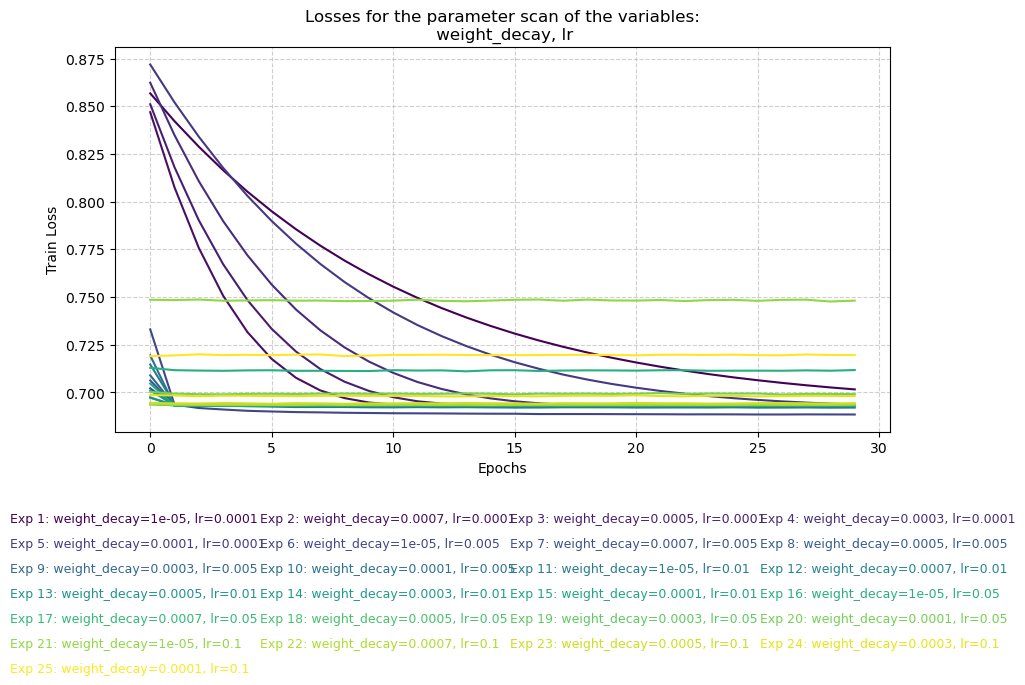

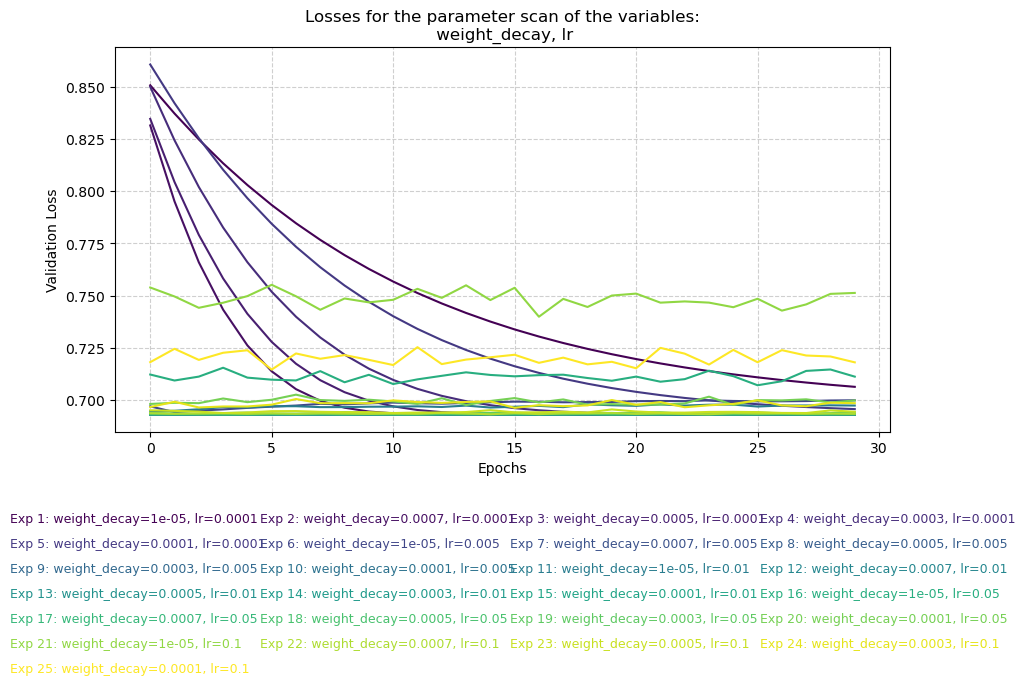

Best learning rate and weight decay: ({'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.01, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}, 12)


In [6]:
# Fixed hyperparameters
n = m = 1000
num_epochs = 30
reps = 1
s = 2.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Values to scan
p_values = [0.5]
d_values = [1]

# Learning rate and weight decay values to scan
lr_values = [1e-4, 5e-3, 1e-2, 5e-2, 1e-1]
weight_decay_values = [1e-5, 7e-4, 5e-4, 3e-4, 1e-4]

# Run parameter scan for lr and weight decay
results = parameter_scan(n=n, m=m, d=d_values, p=p_values, lr=lr_values, weight_decay=weight_decay_values, num_epochs=num_epochs, reps=reps, s=s, device=device, open_browser=False)

with open("./Data/results_parameter_scan_wd_d1.pkl", "wb") as f:
    pickle.dump(results, f)
# Find best parameters
best_params = get_best_params(results, result_metric='accuracy')

plot_losses(results)

print("Best learning rate and weight decay:", best_params)


In [7]:
from visualization import *
import pickle

with open("./Data/results_parameter_scan_wd_d1.pkl", "rb") as f:
    results = pickle.load(f)
print("Results loaded from file.")

print_results(results, indices=None, params_off=False, metric="accuracy")


Results loaded from file.
Index: 0, Params: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: [0.501]
Index: 1, Params: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0007, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: [0.5026]
Index: 2, Params: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0005, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: [0.50364]
Index: 3, Params: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0003, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: [0.50124]
Index: 4, Params: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.0001, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: [0.49896]
Index: 5, Params: {'n': 1000, 'm': 1000, 'd': 1, 'p': 0.5, 'lr': 0.005, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: [0.50284]
Index: 6, Params: {'n': 1000, 'm': 100

# Parameter Scan on p, d

In [ ]:
# Fixed hyperparameters
n = m = 1000
lr = 1e-2
weight_decay = 5e-6
num_epochs = 30
reps = 1
s = 2.0
reps = 1  # Number of repetitions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Values to scan
p_values = [0.1, 0.2, 0.5, 0.8, 1.0]
d_values = list(range(2, 11, 2))

# Run parameter scan
results = parameter_scan(
    n=n,
    m=m,
    d=d_values,
    p=p_values,
    lr=lr,
    weight_decay=weight_decay,
    num_epochs=num_epochs,
    reps=reps,
    s=s,
    device=device,
)


Results loaded from file.


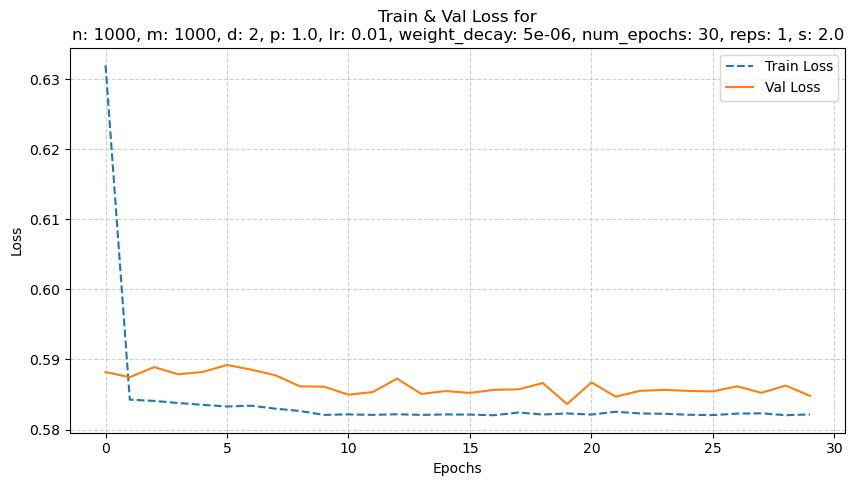

Best configuration found: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: 0.66416 (Index: 4)
Saved heatmap as ./Results/heatmap_accuracy_p_d.png


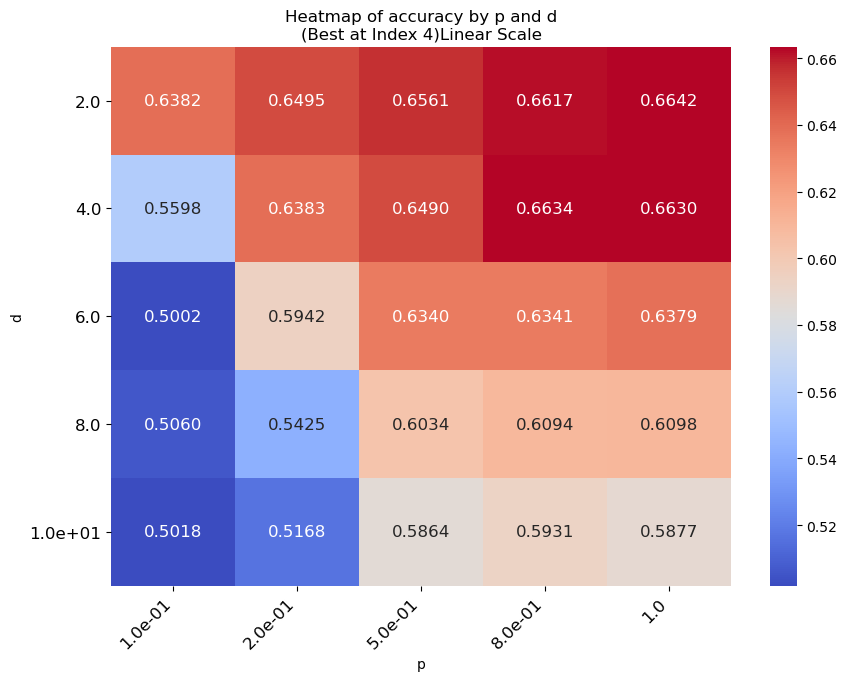

Best configuration found: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, reconstruction_errors: 0.09158938378095627 (Index: 3)
Saved heatmap as ./Results/heatmap_reconstruction_errors_p_d.png


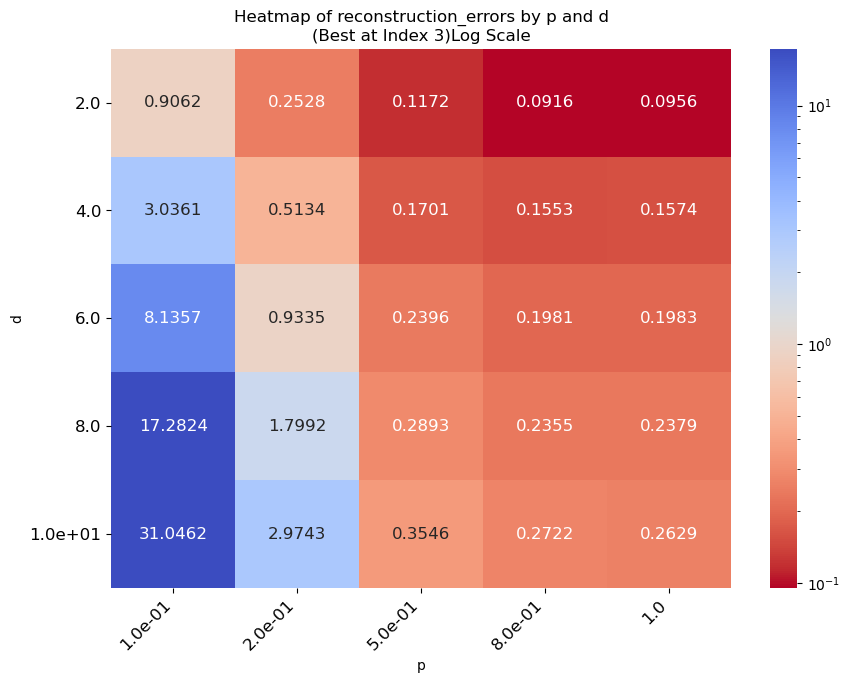

Best parameters for reconstruction_errors (Index: 3): {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.09158938378095627 
Best parameters for log_likelihoods (Index: 4): {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: -0.5864826799429896 
Best parameters for accuracy (Index: 4): {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.66416 
Best parameters for gt_log_likelihoods (Index: 4): {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: -0.20554119548605532 
Best parameters for gt_accuracy (Index: 5): {'n': 1000, 'm': 1000, 'd': 4, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.6914 
Best parameters for train_losses (Index: 

{'reconstruction_errors': ({'n': 1000,
   'm': 1000,
   'd': 2,
   'p': 0.8,
   'lr': 0.01,
   'weight_decay': 5e-06,
   'num_epochs': 30,
   'reps': 1,
   's': 2.0},
  3),
 'log_likelihoods': ({'n': 1000,
   'm': 1000,
   'd': 2,
   'p': 1.0,
   'lr': 0.01,
   'weight_decay': 5e-06,
   'num_epochs': 30,
   'reps': 1,
   's': 2.0},
  4),
 'accuracy': ({'n': 1000,
   'm': 1000,
   'd': 2,
   'p': 1.0,
   'lr': 0.01,
   'weight_decay': 5e-06,
   'num_epochs': 30,
   'reps': 1,
   's': 2.0},
  4),
 'gt_log_likelihoods': ({'n': 1000,
   'm': 1000,
   'd': 2,
   'p': 1.0,
   'lr': 0.01,
   'weight_decay': 5e-06,
   'num_epochs': 30,
   'reps': 1,
   's': 2.0},
  4),
 'gt_accuracy': ({'n': 1000,
   'm': 1000,
   'd': 4,
   'p': 0.1,
   'lr': 0.01,
   'weight_decay': 5e-06,
   'num_epochs': 30,
   'reps': 1,
   's': 2.0},
  5),
 'train_losses': ({'n': 1000,
   'm': 1000,
   'd': 2,
   'p': 1.0,
   'lr': 0.01,
   'weight_decay': 5e-06,
   'num_epochs': 30,
   'reps': 1,
   's': 2.0},
  4),
 'v

In [1]:
import pickle
import torch
from helpers import *
from visualization import *

# open the file and put it in results with pickle load
with open("./Data/results_parameter_scan_p_d.pkl", "rb") as f:
    results = pickle.load(f)

print("Results loaded from file.")
# Values to scan
p_values = [0.1, 0.2, 0.5, 0.8, 1.0]
d_values = list(range(2, 11, 2))

# Plot losses
plot_losses(results, param_index=4, save_path="./Results/losses_p_d")

# Plot heatmap for accuracy
plot_heatmap_best_fixed(results, param_x="p", param_y="d", result_metric="accuracy", save_path="./Results/heatmap_accuracy_p_d")
plot_heatmap_best_fixed(results, param_x="p", param_y="d", result_metric="reconstruction_errors", save_path="./Results/heatmap_reconstruction_errors_p_d", invert_colors=True, log_scale=True)

get_best_params_all_metrics(results)

In [ ]:
# # Saving results
# with open("Data/results_parameter_scan_p_d.pkl", "wb") as f:
#     pickle.dump(results, f)

# print("Results saved successfully!")

Results saved successfully!


# Parameter scan p, d, lr and weight decay

In [ ]:
import torch  # type: ignore
import pickle
# Fixed hyperparameters
n = m = 1000
num_epochs = 30
reps = 1
s = 2.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Values to scan
d_values = [2, 10]
p_values = [0.1, 1.0]
lr_values = [1e-2, 5e-3, 1e-3, 1e-4]  # 4 valeurs entre 1e-2 et 1e-4
weight_decay_values = torch.logspace(-6, -2, steps=10).tolist()  # 10 valeurs entre 1e-6 et 1e-2

# Run parameter scan
results = parameter_scan(
    n=n, m=m, d=d_values, p=p_values, lr=lr_values, weight_decay=weight_decay_values,
    num_epochs=num_epochs, reps=reps, s=s, device=device
)

# save results
# with open("Data/results_hyperparam_scan_lr_wd.pkl", "wb") as f:
#     pickle.dump(results, f)
# print("Results saved successfully!")

# Visualise results
plot_heatmap_fixed(results, param_x="lr", param_y="weight_decay", result_metric="accuracy", fixed_index=0)


Results loaded successfully!
Saved heatmap as Results/heatmap_hyperparam_scan_lr_wd_2.png


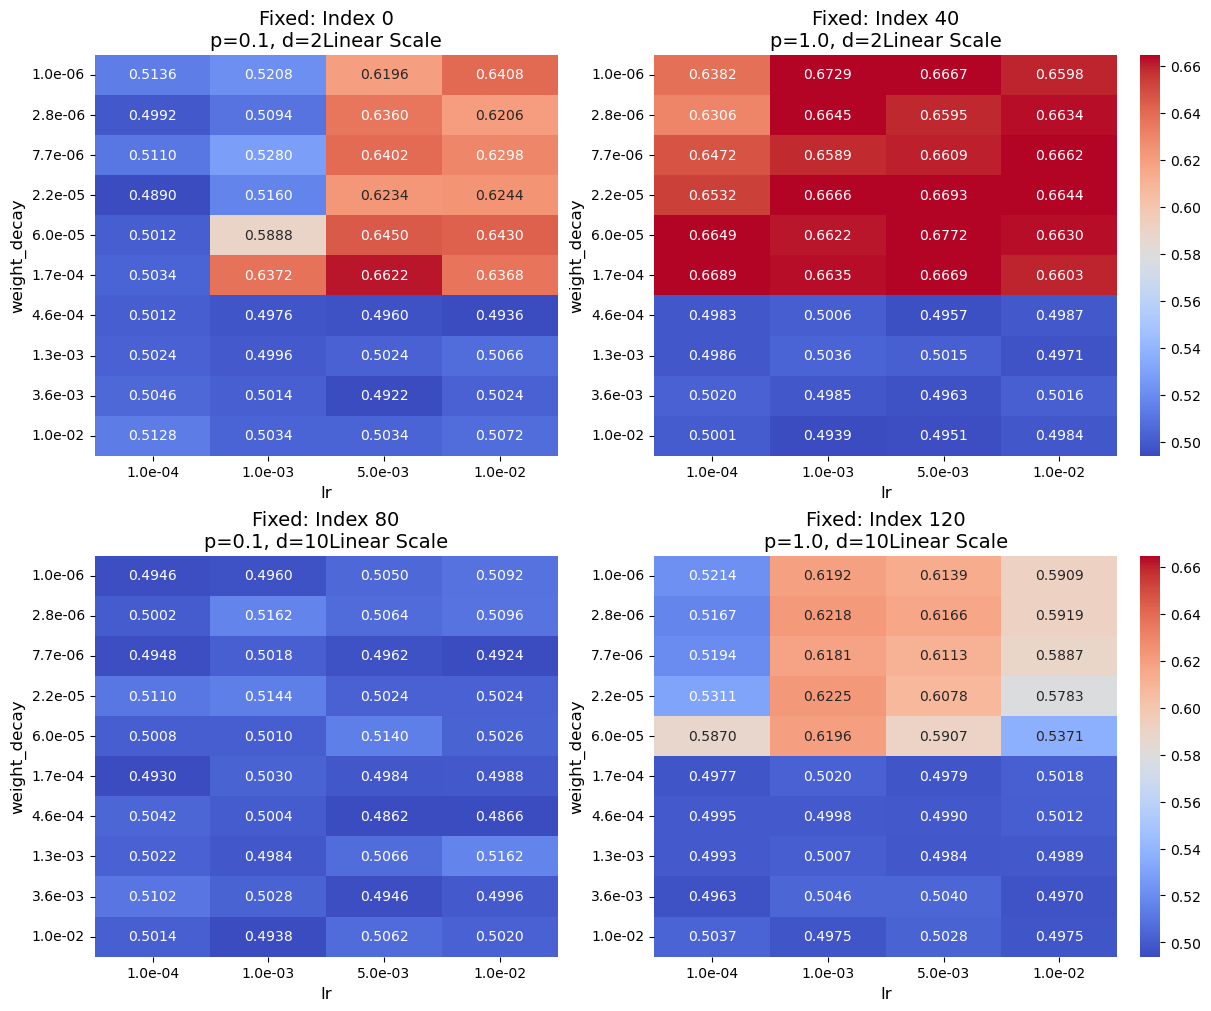

Saved heatmap as Results/heatmap_hyperparam_scan_lr_wd_reconstruction_errors.png


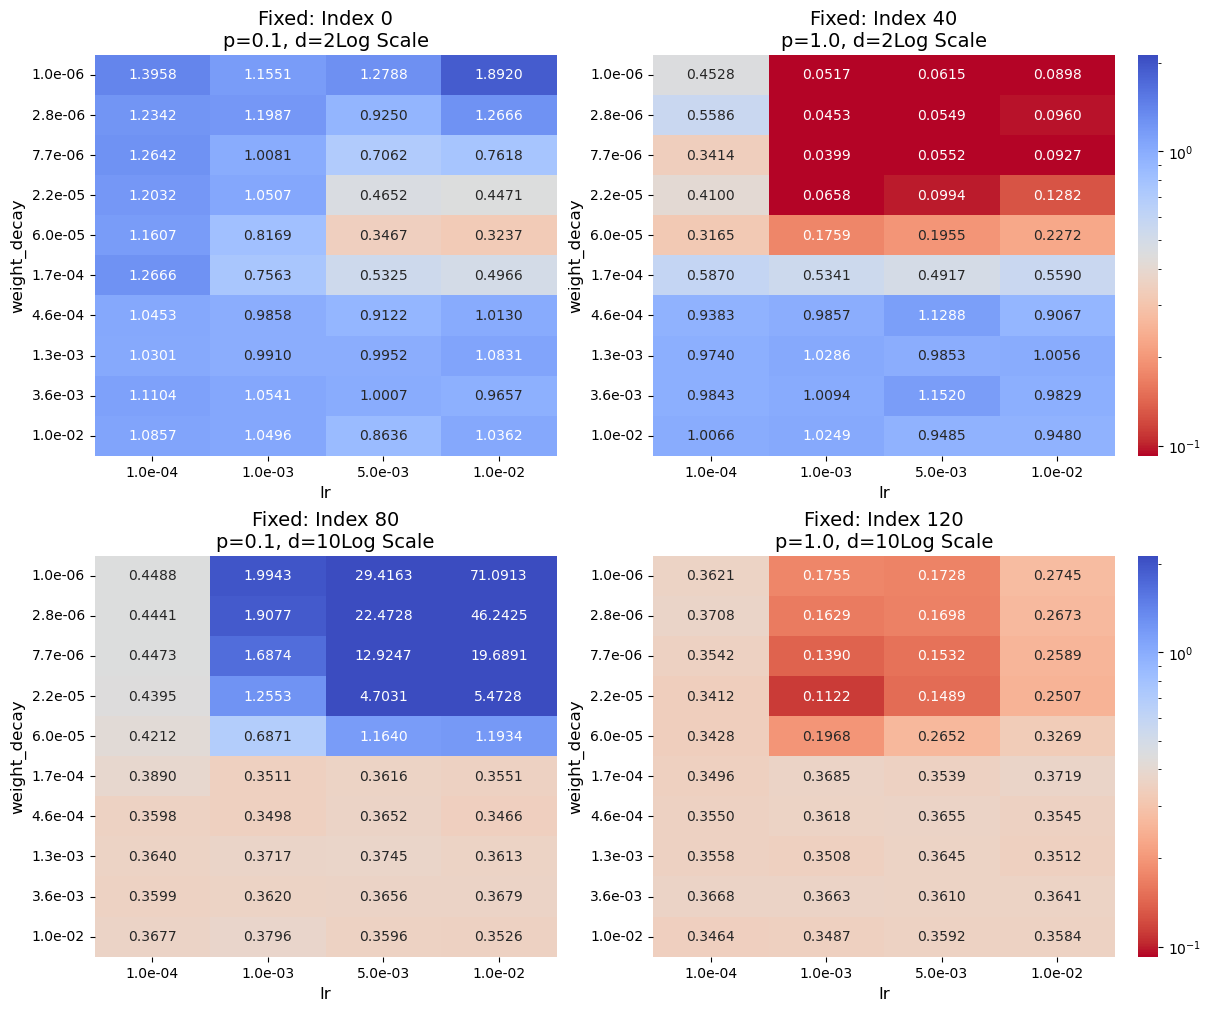

Best parameters for accuracy (Index: 54): {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.67722 


In [2]:
import pickle
import matplotlib.pyplot as plt
from visualization import plot_heatmap_fixed, plot_multiple_heatmaps, get_best_params

# 1) Load results from the saved file
file_path = "Data/results_hyperparam_scan_lr_wd.pkl"
with open(file_path, "rb") as f:
    results = pickle.load(f)
print("Results loaded successfully!")

# 2) Define the (d, p) combinations
d_values = [2, 10]
p_values = [0.1, 1.0]


plot_multiple_heatmaps(
    results,
    param_x="lr",
    param_y="weight_decay",
    result_metric="accuracy",
    fixed_indices=[0, 40, 80, 120],
    save_path="Results/heatmap_hyperparam_scan_lr_wd_2"
)

plot_multiple_heatmaps(
    results,
    param_x="lr",
    param_y="weight_decay",
    result_metric="reconstruction_errors",
    fixed_indices=[0, 40, 80, 120],
    save_path="Results/heatmap_hyperparam_scan_lr_wd_reconstruction_errors",
    log_scale=True,
    invert_colors=True
)

# Find best parameters based on accuracy
best_params = get_best_params(results, result_metric="accuracy")


# Parameter Scan on n, m, d

In [1]:
import pickle
import torch
from helpers import parameter_scan

# Fixed hyperparameters
lr = 5e-3
weight_decay = 5e-5
p = 0.5
num_epochs = 30
reps = 1
s = 2.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Manually defined values (scientific notation)
n_values = [3e2, 7e2, 1e3, 15e2, 3e3]
m_values = [3e2, 7e2, 1e3, 15e2, 3e3]
d_values = [2, 5]  

# Convert to int
n_values = [int(n) for n in n_values]
m_values = [int(m) for m in m_values]

# Run parameter scan
results = parameter_scan(
    n=n_values, m=m_values, d=d_values, p=p, lr=lr, weight_decay=weight_decay,
    num_epochs=num_epochs, reps=reps, s=s, device=device
)

# Save results to file
file_path = "Data/results_hyperparam_scan_d_m_n_2.pkl"

with open(file_path, "wb") as f:
    pickle.dump(results, f)

print(f"✅ Results saved successfully to {file_path}")



Running experiment with parameters: {'n': 300, 'm': 300, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:04<00:00,  6.84it/s]



Running experiment with parameters: {'n': 300, 'm': 300, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:04<00:00,  6.61it/s]



Running experiment with parameters: {'n': 300, 'm': 700, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.90it/s]



Running experiment with parameters: {'n': 300, 'm': 700, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:15<00:00,  1.95it/s]



Running experiment with parameters: {'n': 300, 'm': 1000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:14<00:00,  2.03it/s]



Running experiment with parameters: {'n': 300, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:22<00:00,  1.36it/s]



Running experiment with parameters: {'n': 300, 'm': 1500, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:39<00:00,  1.32s/it]



Running experiment with parameters: {'n': 300, 'm': 1500, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:40<00:00,  1.36s/it]



Running experiment with parameters: {'n': 300, 'm': 3000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:37<00:00,  3.24s/it]



Running experiment with parameters: {'n': 300, 'm': 3000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:45<00:00,  3.51s/it]



Running experiment with parameters: {'n': 700, 'm': 300, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:17<00:00,  1.71it/s]



Running experiment with parameters: {'n': 700, 'm': 300, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:24<00:00,  1.22it/s]



Running experiment with parameters: {'n': 700, 'm': 700, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:42<00:00,  1.43s/it]



Running experiment with parameters: {'n': 700, 'm': 700, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:55<00:00,  1.85s/it]



Running experiment with parameters: {'n': 700, 'm': 1000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:01<00:00,  2.04s/it]



Running experiment with parameters: {'n': 700, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:21<00:00,  2.71s/it]



Running experiment with parameters: {'n': 700, 'm': 1500, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:49<00:00,  3.65s/it]



Running experiment with parameters: {'n': 700, 'm': 1500, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:32<00:00,  3.07s/it]



Running experiment with parameters: {'n': 700, 'm': 3000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:53<00:00,  5.77s/it]



Running experiment with parameters: {'n': 700, 'm': 3000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:18<00:00,  6.62s/it]



Running experiment with parameters: {'n': 1000, 'm': 300, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:15<00:00,  1.95it/s]



Running experiment with parameters: {'n': 1000, 'm': 300, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:23<00:00,  1.30it/s]



Running experiment with parameters: {'n': 1000, 'm': 700, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:37<00:00,  1.24s/it]



Running experiment with parameters: {'n': 1000, 'm': 700, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:04<00:00,  2.17s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:54<00:00,  1.81s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:28<00:00,  2.96s/it]



Running experiment with parameters: {'n': 1000, 'm': 1500, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:59<00:00,  3.97s/it]



Running experiment with parameters: {'n': 1000, 'm': 1500, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:14<00:00,  4.49s/it]



Running experiment with parameters: {'n': 1000, 'm': 3000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [05:08<00:00, 10.27s/it]



Running experiment with parameters: {'n': 1000, 'm': 3000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:29<00:00,  8.97s/it]



Running experiment with parameters: {'n': 1500, 'm': 300, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:35<00:00,  1.20s/it]



Running experiment with parameters: {'n': 1500, 'm': 300, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:36<00:00,  1.22s/it]



Running experiment with parameters: {'n': 1500, 'm': 700, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:20<00:00,  2.69s/it]



Running experiment with parameters: {'n': 1500, 'm': 700, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:33<00:00,  3.11s/it]



Running experiment with parameters: {'n': 1500, 'm': 1000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:01<00:00,  4.05s/it]



Running experiment with parameters: {'n': 1500, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:19<00:00,  4.64s/it]



Running experiment with parameters: {'n': 1500, 'm': 1500, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:20<00:00,  6.68s/it]



Running experiment with parameters: {'n': 1500, 'm': 1500, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:21<00:00,  6.72s/it]



Running experiment with parameters: {'n': 1500, 'm': 3000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [06:27<00:00, 12.93s/it]



Running experiment with parameters: {'n': 1500, 'm': 3000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [35:43<00:00, 71.45s/it]   



Running experiment with parameters: {'n': 3000, 'm': 300, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:21<00:00,  8.70s/it]



Running experiment with parameters: {'n': 3000, 'm': 300, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:24<00:00,  8.81s/it]



Running experiment with parameters: {'n': 3000, 'm': 700, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [10:15<00:00, 20.52s/it]



Running experiment with parameters: {'n': 3000, 'm': 700, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [12:18<00:00, 24.63s/it]



Running experiment with parameters: {'n': 3000, 'm': 1000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [14:56<00:00, 29.89s/it]



Running experiment with parameters: {'n': 3000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [17:39<00:00, 35.31s/it]



Running experiment with parameters: {'n': 3000, 'm': 1500, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [21:01<00:00, 42.04s/it]



Running experiment with parameters: {'n': 3000, 'm': 1500, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [1:30:35<00:00, 181.19s/it]   



Running experiment with parameters: {'n': 3000, 'm': 3000, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [20:51<00:00, 41.72s/it]



Running experiment with parameters: {'n': 3000, 'm': 3000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [26:59<00:00, 53.99s/it]


✅ Results saved successfully to Data/results_hyperparam_scan_d_m_n_2.pkl


✅ Results loaded successfully!


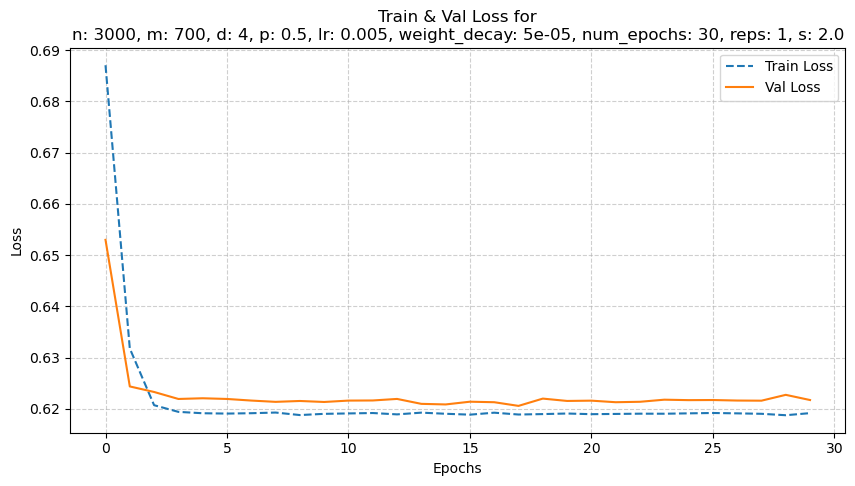

Best parameters for accuracy (Index: 29): {'n': 3000, 'm': 700, 'd': 4, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.6582857142857143 


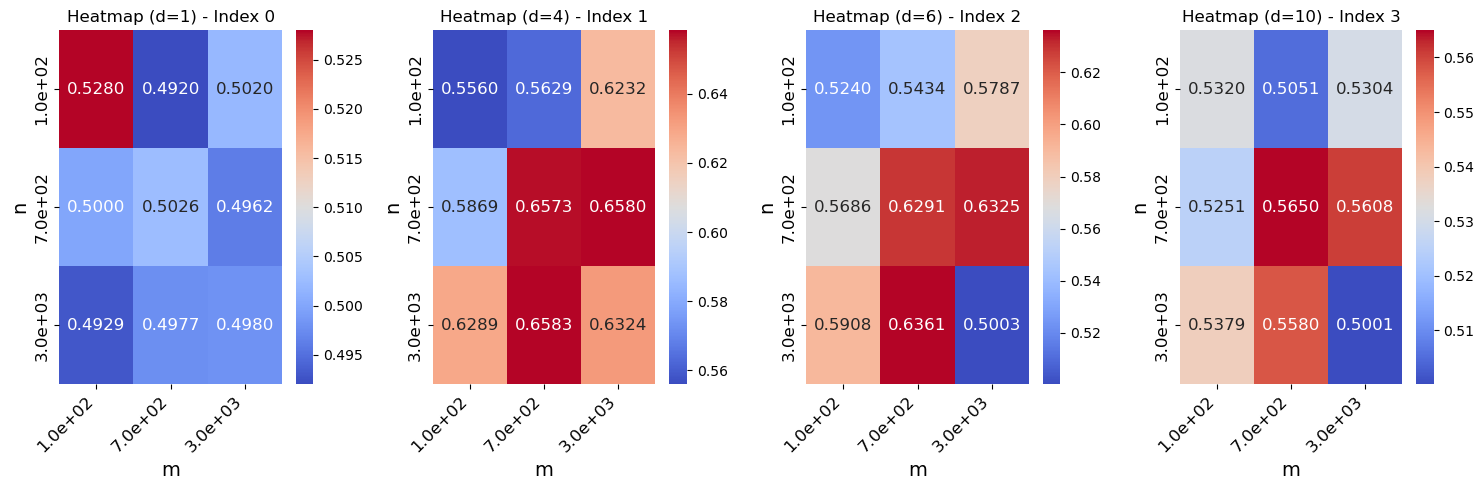

In [7]:
import pickle
from visualization import plot_3d_scatter, plot_losses

# Manually defined values (scientific notation)
n_values = [1e2, 7e2, 3e3]  # 100, 500, 1000, 5000, 10000
m_values = [1e2, 7e2, 3e3]  # 100, 500, 1000, 5000, 10000
d_values = [1, 4, 6, 10]  # 4 values between 1 and 10

# Load results
file_path = "Data/results_hyperparam_scan_d_m_n.pkl"

with open(file_path, "rb") as f:
    results = pickle.load(f)

print("✅ Results loaded successfully!")

# Generate the 3D plot
plot_3d_scatter(results, param_x="n", param_y="m", param_z="d", result_metric="accuracy")

# Plot losses
plot_losses(results, param_index=29, save_path="Results/losses_n_m_d")

# Find best parameters based on accuracy
import torch  # type: ignore
from visualization import get_best_params

best_params = get_best_params(results, result_metric="accuracy")

# make a loop for all the heatmaps of n
fig, axes = plt.subplots(1, len(d_values), figsize=(15, 5))

# Loop over the n values

for i, d in enumerate(d_values):
    # Find the first experiment index where n matches
    fixed_index = next(
        (idx for idx, exp in enumerate(results) if exp["params"]["d"] == d), None
    )

    # If no matching experiment is found, skip
    if fixed_index is None:
        print(f"No results found for n={n}")
        continue

    # Get the correct Axes for this subplot
    ax = axes[i]

    # Plot the heatmap on the chosen subplot
    plot_heatmap_fixed(
        results,
        param_x="m",
        param_y="n",
        result_metric="accuracy",
        fixed_index=fixed_index,
        ax=ax,
    )

    ax.set_title(f"Heatmap (d={d}) - Index {fixed_index}")

# save the figure on png

plt.tight_layout()
plt.savefig("Results/heatmap_hyperparam_scan_n_m_d.png")
plt.show()


# Some other results of parameter scan on m, n and d

✅ Results loaded successfully!


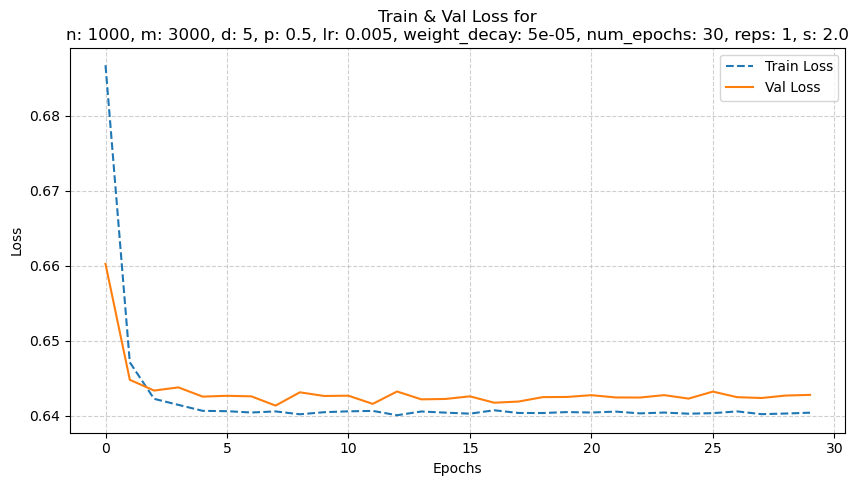

Best parameters for accuracy (Index: 10): {'n': 700, 'm': 300, 'd': 2, 'p': 0.5, 'lr': 0.005, 'weight_decay': 5e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.6678095238095239 
Saved heatmap as Results/heatmap_hyperparam_scan_n_m_d_2.png


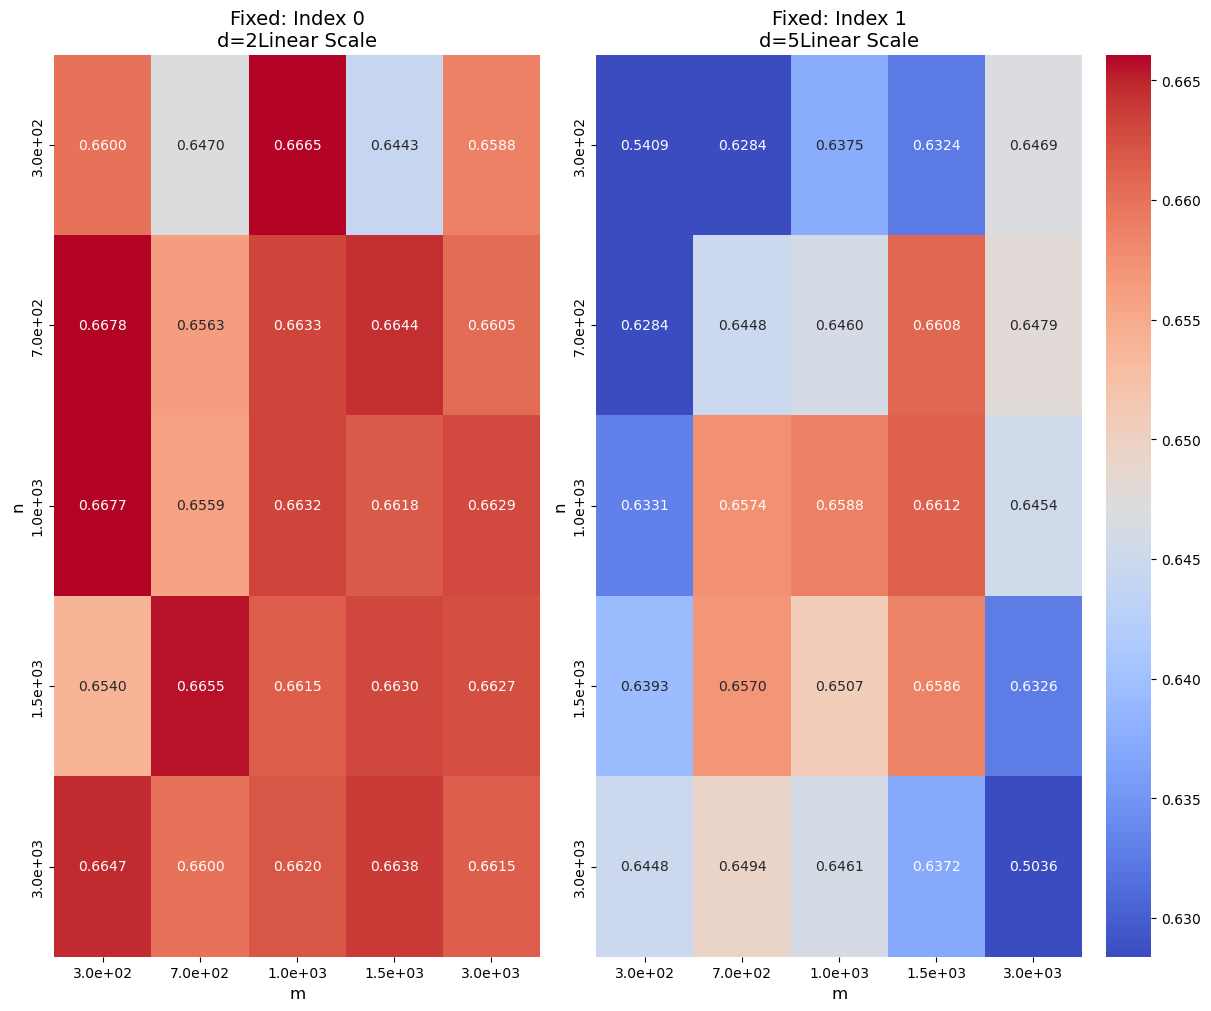

In [8]:
import pickle
from visualization import plot_3d_scatter, plot_losses, plot_all_heatmaps, plot_heatmap_fixed
from matplotlib import pyplot as plt

# Manually defined values (scientific notation)
n_values = [1e2, 7e2, 3e3]  # 100, 500, 1000, 5000, 10000
m_values = [1e2, 7e2, 3e3]  # 100, 500, 1000, 5000, 10000
d_values = [1, 4, 6, 10]  # 4 values between 1 and 10

# Load results
file_path = "Data/results_hyperparam_scan_d_m_n_2.pkl"

with open(file_path, "rb") as f:
    results = pickle.load(f)

print("✅ Results loaded successfully!")

# Generate the 3D plot
plot_3d_scatter(results, param_x="n", param_y="m", param_z="d", result_metric="accuracy")

# Plot losses
plot_losses(results, param_index=29, save_path="Results/losses_n_m_d")

# Find best parameters based on accuracy
import torch  # type: ignore
from visualization import get_best_params

best_params = get_best_params(results, result_metric="accuracy")

# plot the heatmaps with same axis
plot_all_heatmaps(
    results,
    param_x="m",
    param_y="n",
    result_metric="accuracy",  
    save_path="Results/heatmap_hyperparam_scan_n_m_d_2"
)

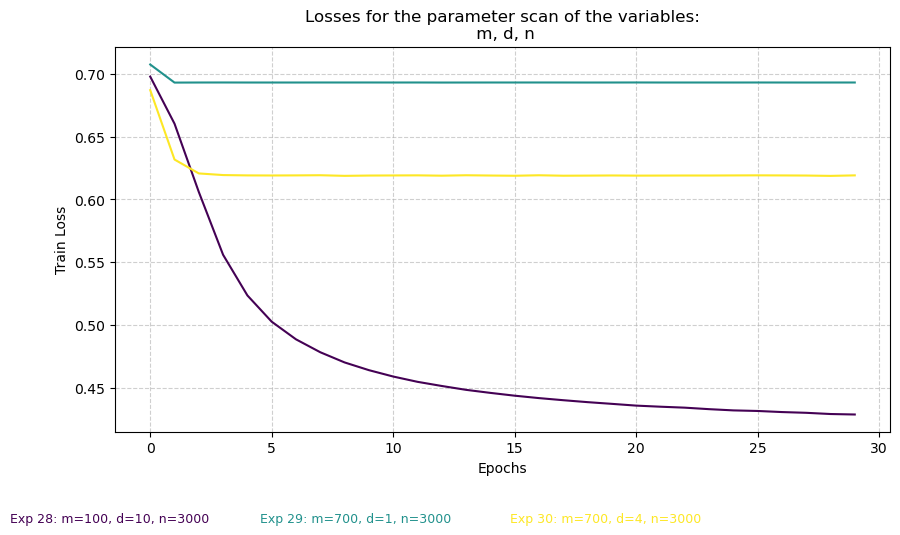

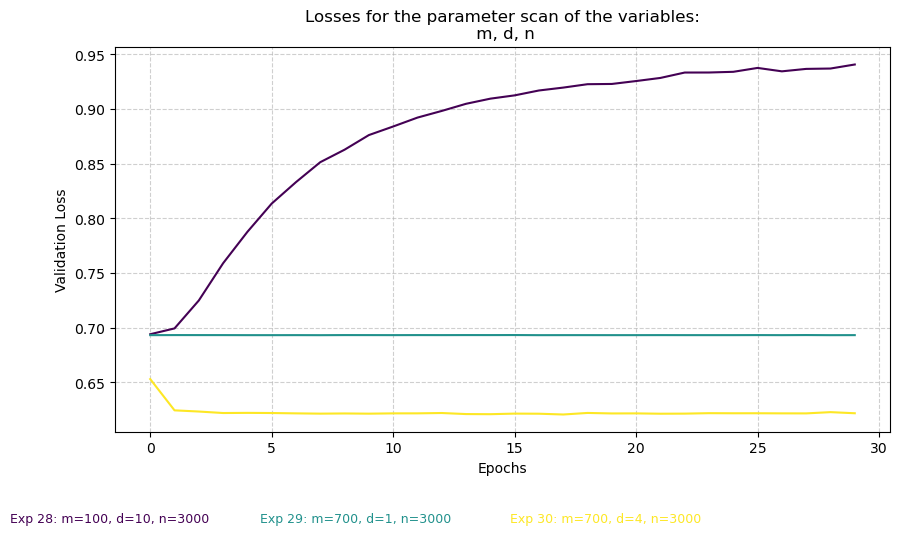

In [9]:
from visualization import plot_losses
plot_losses(results, selected_indices=[27, 28, 29], save_path="Results/losses_n_m_d_selected")

In [3]:
from visualization import display_experiment_indices
display_experiment_indices(results)


Available Experiments:
Index | Parameters
--------------------------------------
0     | n=100, m=100, d=1, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
1     | n=100, m=100, d=4, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
2     | n=100, m=100, d=6, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
3     | n=100, m=100, d=10, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
4     | n=100, m=700, d=1, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
5     | n=100, m=700, d=4, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
6     | n=100, m=700, d=6, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
7     | n=100, m=700, d=10, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
8     | n=100, m=3000, d=1, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30, reps=1, s=2.0
9     | n=100, m=3000, d=4, p=0.5, lr=0.005, weight_decay=5e-05, num_epochs=30

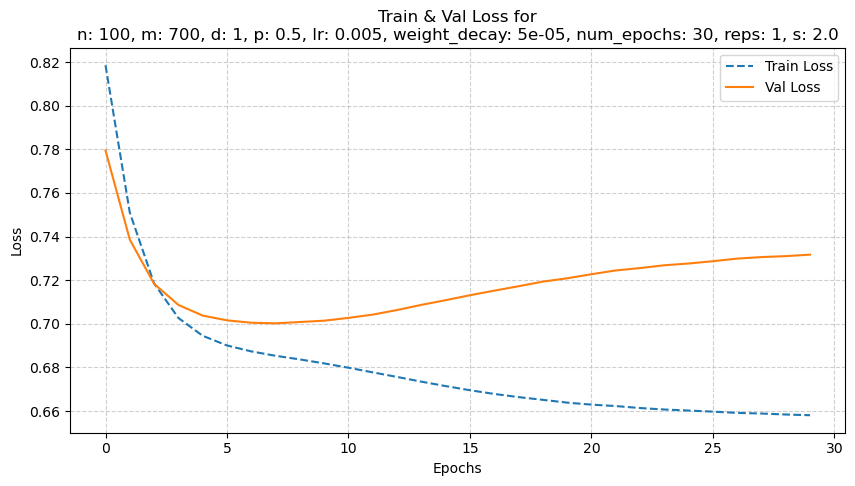

In [4]:
plot_losses(results, 4)

In [ ]:
# Load results from the saved file
# with open("Data/results.pkl", "rb") as f:
#     loaded_results = pickle.load(f)

# print("Results loaded successfully!")